# Exploring the data
author: Nora Maleki (noora.maleki@gmail.com)
March 2022

## Import libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [72]:
colorblind_palette = ['#b2182b','#5ab4ac', '#2d004b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='white')

## Load datasets

In [73]:
FILE_PATH = r'../../data/01_main'

In [74]:
dataset = pd.read_csv(f'{FILE_PATH}/01_coordinates_integrated.csv', index_col=[0])
all_buildings = pd.read_csv(f'{FILE_PATH}/02_all_buildings_list.csv', index_col=[0])
avatar_info = pd.read_csv(f'{FILE_PATH}/03_avatar_info_list.csv', index_col=[0])
print('Done!')

Done!


### Glimpse at the data

In [75]:
dataset.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_y,PointerDirection_z,Angle,BuildingPositionLocal_x,...,vector_PartPos,vector_BuildingPos,vector_PointerPos,Vector_Participant-Building,Vector_Participant-Pointer,Dot_Pointer-Building-Participant,Magnitud_Participant-Pointer,Magnitud_Participant-Building,radians,degrees
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.062026,0.681399,87.005028,255.062286,...,"(-33.36262512207031, -190.91201782226562)","(255.06228637695312, -1.663042545318603)","(-33.59077453613281, -190.70962524414062)","(288.42491149902344, 189.24897527694702)","(-0.2281494140625, 0.202392578125)",-27.501387,0.304983,344.969715,1.835264,105.152855
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.213414,0.254118,44.100197,255.062286,...,"(118.41200256347656, -62.941864013671875)","(255.06228637695312, -1.663042545318603)","(118.647705078125, -63.044891357421875)","(136.65028381347656, 61.27882146835327)","(0.2357025146484375, -0.10302734375)",25.895421,0.257236,149.761123,0.833633,47.763652
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.212654,0.513045,47.522392,255.062286,...,"(257.92999267578125, -33.097686767578125)","(255.06228637695312, -1.663042545318603)","(257.59869384765625, -32.840240478515625)","(-2.867706298828125, 31.43464422225952)","(-0.331298828125, 0.2574462890625)",9.042800,0.419568,31.565180,0.819211,46.937344
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.081270,0.151506,1.100918,255.062286,...,"(-242.93321228027344, 39.0379638671875)","(255.06228637695312, -1.663042545318603)","(-242.87901306152344, 38.95323944091797)","(497.99549865722656, -40.7010064125061)","(0.05419921875, -0.08472442626953125)",30.439336,0.100577,499.655970,0.920139,52.720091
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,0.056222,-0.416039,29.176662,255.062286,...,"(-320.9744873046875, 77.1971664428711)","(255.06228637695312, -1.663042545318603)","(-320.853759765625, 77.00957489013672)","(576.0367736816406, -78.8602089881897)","(0.1207275390625, -0.187591552734375)",84.337011,0.223082,581.409750,0.862902,49.440636


In [76]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 3023
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SubjectID                         3024 non-null   int64  
 1   ParticipantPosition_x             3024 non-null   float64
 2   ParticipantPosition_z             3024 non-null   float64
 3   PointerPosition_x                 3024 non-null   float64
 4   PointerPosition_z                 3024 non-null   float64
 5   PointerDirection_x                3024 non-null   float64
 6   PointerDirection_y                3024 non-null   float64
 7   PointerDirection_z                3024 non-null   float64
 8   Angle                             3024 non-null   float64
 9   BuildingPositionLocal_x           3024 non-null   float64
 10  BuildingPositionLocal_y           3024 non-null   float64
 11  SignedAngle-+180                  3024 non-null   float64
 12  Signed

In [77]:
dataset.describe()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_y,PointerDirection_z,Angle,BuildingPositionLocal_x,...,PointingTargetBuildingId,avatarID,Trials,TrialID,RT,Dot_Pointer-Building-Participant,Magnitud_Participant-Pointer,Magnitud_Participant-Building,radians,degrees
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,...,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,5949.222222,-2.380455,14.179977,-2.105650,14.240982,-0.062420,0.049247,-0.019174,49.312632,-0.507066,...,29.076058,28.521495,55.543651,168.500000,7.694524,211.732028,0.654070,268.227781,1.084565,62.141000
std,2679.017027,174.526182,137.780203,174.422929,137.616658,0.711618,0.063007,0.694938,43.940893,201.542360,...,16.729943,16.143405,32.306260,97.010457,5.776413,8369.270787,13.277142,133.901451,0.825415,47.292774
min,365.000000,-326.886047,-191.062988,-327.157532,-191.119629,-0.999783,-0.107550,-0.999844,0.000000,-431.064392,...,1.000000,1.000000,0.000000,1.000000,0.955793,-339.516977,0.082994,15.586697,0.000718,0.041118
25%,4176.000000,-121.389214,-131.491875,-114.630356,-128.914780,-0.786176,0.011022,-0.697728,13.787071,-153.392502,...,14.000000,15.000000,28.000000,84.750000,3.419546,-3.540310,0.274503,173.853627,0.410019,23.492378
50%,6642.000000,-15.471565,33.366211,1.953339,33.455299,-0.127837,0.031453,-0.036454,36.979969,-3.306354,...,29.000000,29.000000,56.000000,168.500000,5.872636,39.073825,0.327167,243.993779,0.887194,50.832459
75%,7842.000000,123.511269,135.194962,137.915379,135.195560,0.630784,0.066026,0.674460,72.340826,151.605972,...,43.000000,43.000000,84.000000,252.250000,9.962899,76.360604,0.394744,351.346622,1.629042,93.337221
max,9472.000000,366.834778,235.882217,366.869934,235.829254,0.999977,0.741587,0.999944,179.972031,401.828735,...,59.000000,56.000000,111.000000,336.000000,30.010961,453402.151930,688.357250,728.521287,3.138685,179.833419


In [78]:
all_buildings.head()

,BuildingID,BuildingName,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
0,59,Crane_59,-318.127991,26.896717,-167.823914,-313.499451,1.614944,-150.514664,-313.499451,1.614944,...,1.20745,2.423655e-01,-7.277503e-09,9.701850e-01,5.915870e-08,1.000000e+00,-7.277503e-09,0.970185,-5.915870e-08,-0.242366
1,58,BasketballCourt_58,104.339996,-0.440584,-45.689999,104.339996,-3.070000,-45.689999,104.339996,-3.070000,...,1.00000,-6.614817e-01,0.000000e+00,7.499613e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.749961,0.000000e+00,0.661482
2,57,Construction_57,-71.695419,0.739893,-26.238297,-71.803406,0.551138,-26.717417,-0.028043,0.005596,...,1.00000,1.490116e-07,1.000000e+00,-1.639128e-07,7.768201e-01,-2.384186e-07,-6.297227e-01,0.629723,0.000000e+00,0.776820
3,48,TaskBuilding_48,-195.637009,7.350957,-130.434052,-195.637512,-0.000015,-130.434052,-195.637512,130.434067,...,1.00000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000
4,52,TaskBuilding_52,-247.185669,4.570368,54.489395,-247.203369,2.410477,54.642479,-247.203369,-54.642483,...,1.00000,1.147317e-01,-4.165431e-07,-9.933965e-01,2.397451e-08,1.000000e+00,-4.165431e-07,-0.993397,-2.397451e-08,-0.114732


In [79]:
all_buildings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 58
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingID                       56 non-null     int64  
 1   BuildingName                     56 non-null     object 
 2   BuildingCenterWorld.x            56 non-null     float64
 3   BuildingCenterWorld.y            56 non-null     float64
 4   BuildingCenterWorld.z            56 non-null     float64
 5   BuildingPositionGlobal.x         56 non-null     float64
 6   BuildingPositionGlobal.y         56 non-null     float64
 7   BuildingPositionGlobal.z         56 non-null     float64
 8   BuildingPositionLocal.x          56 non-null     float64
 9   BuildingPositionLocal.y          56 non-null     float64
 10  BuildingPositionLocal.z          56 non-null     float64
 11  BuildingRotationGlobal.x         56 non-null     float64
 12  BuildingRotationGlobal.y

In [80]:
all_buildings.describe()

,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.y,BuildingCenterWorld.z,BuildingPositionGlobal.x,BuildingPositionGlobal.y,BuildingPositionGlobal.z,BuildingPositionLocal.x,BuildingPositionLocal.y,BuildingPositionLocal.z,...,BuildingLocalScale.z,BuildingForwardDirection.x,BuildingForwardDirection.y,BuildingForwardDirection.z,BuildingUpDirection.x,BuildingUpDirection.y,BuildingUpDirection.z,BuildingRightDirection.x,BuildingRightDirection.y,BuildingRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,56.000000
mean,28.839286,8.897565,6.230483,8.850133,8.891293,-0.699142,9.432957,10.172996,-15.121614,-5.762569,...,1.003704,0.092599,7.142840e-02,0.099134,2.409818e-02,8.571428e-01,-1.916140e-02,0.124996,-3.602064e-08,-0.075923
std,16.827226,192.782942,5.453986,124.984650,192.946374,3.398881,124.649720,192.638739,121.578577,24.067370,...,0.027722,0.560289,3.745127e-01,0.734892,2.720723e-01,3.530940e-01,2.654545e-01,0.777820,1.314038e-07,0.625620
min,1.000000,-336.362793,-0.791109,-255.873932,-338.406921,-6.542114,-256.052216,-338.406921,-293.247589,-150.514664,...,1.000000,-0.950611,-1.000000e+00,-1.000000,-9.998724e-01,-2.384186e-07,-9.999999e-01,-1.000000,-4.172325e-07,-0.999872
25%,14.750000,-136.218853,4.085809,-66.197618,-136.462280,-2.367606,-66.331362,-136.462280,-102.433153,-2.426545,...,1.000000,-0.632546,-3.650081e-07,-0.743667,-8.064804e-08,1.000000e+00,-3.809883e-07,-0.746625,-1.117616e-07,-0.631021
50%,28.500000,1.375929,5.244463,9.003581,1.302004,-1.151408,9.077952,2.941159,-10.794964,-1.305926,...,1.000000,0.057366,-9.727868e-08,0.169295,4.079921e-08,1.000000e+00,-1.388518e-07,0.625363,-3.162905e-08,-0.150597
75%,42.250000,143.431297,7.395142,102.297266,146.388565,0.595204,102.433146,146.388565,55.490621,0.422222,...,1.000000,0.579345,0.000000e+00,0.762951,1.512802e-07,1.000000e+00,0.000000e+00,0.774274,6.304895e-08,0.648394
max,59.000000,401.768616,31.293985,288.053894,401.828735,18.361389,293.247559,401.828735,256.052246,18.361364,...,1.207450,0.940934,1.000000e+00,1.000000,9.893244e-01,1.000000e+00,9.417416e-01,1.000000,1.851118e-07,0.989324


In [81]:
avatar_info.head()

,AvatarID,AvatarName,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,AvatarPositionLocal.y,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
0,2,02_Cma,-147.664993,3.072653,67.390167,-147.646744,2.345342,67.389999,-351.640015,6.398831,...,1.0,0.000000,0.0,1.000000,0.0,1.0,0.0,1.000000,0.0,0.000000
1,42,42_Sa,65.630707,-1.885010,-52.687607,65.613266,-2.612321,-52.674149,-138.380005,1.441168,...,1.0,-0.605179,0.0,-0.796090,0.0,1.0,0.0,-0.796090,0.0,0.605179
2,36,36_Sa,162.001144,-0.394517,133.271271,162.000000,-1.121828,133.300003,-41.993271,2.931661,...,1.0,0.664752,0.0,0.747064,0.0,1.0,0.0,0.747064,0.0,-0.664752
3,38,38_Sa,150.833649,-1.489311,-43.709518,150.816269,-2.300489,-43.692154,-53.176998,1.753000,...,1.0,0.711973,0.0,0.702207,0.0,1.0,0.0,0.702207,0.0,-0.711973
4,41,41_Sa,92.128632,0.218283,38.293304,92.163269,-0.467581,38.295853,-111.830002,3.585908,...,1.0,0.743769,0.0,-0.668437,0.0,1.0,0.0,-0.668437,0.0,-0.743769


In [82]:
avatar_info.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AvatarID                       56 non-null     int64  
 1   AvatarName                     56 non-null     object 
 2   AvatarCenterWorld.x            56 non-null     float64
 3   AvatarCenterWorld.y            56 non-null     float64
 4   AvatarCenterWorld.z            56 non-null     float64
 5   AvatarPositionGlobal.x         56 non-null     float64
 6   AvatarPositionGlobal.y         56 non-null     float64
 7   AvatarPositionGlobal.z         56 non-null     float64
 8   AvatarPositionLocal.x          56 non-null     float64
 9   AvatarPositionLocal.y          56 non-null     float64
 10  AvatarPositionLocal.z          56 non-null     float64
 11  AvatarRotationGlobal.x         56 non-null     float64
 12  AvatarRotationGlobal.y         56 non-null     float

In [83]:
avatar_info.describe()

,AvatarID,AvatarCenterWorld.x,AvatarCenterWorld.y,AvatarCenterWorld.z,AvatarPositionGlobal.x,AvatarPositionGlobal.y,AvatarPositionGlobal.z,AvatarPositionLocal.x,AvatarPositionLocal.y,AvatarPositionLocal.z,...,AvatarLocalScale.z,AvatarForwardDirection.x,AvatarForwardDirection.y,AvatarForwardDirection.z,AvatarUpDirection.x,AvatarUpDirection.y,AvatarUpDirection.z,AvatarRightDirection.x,AvatarRightDirection.y,AvatarRightDirection.z
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,28.500000,9.451360,-0.154723,8.906428,9.479183,-0.852688,8.787668,-194.514089,3.200802,-224.888190,...,1.0,0.152601,-0.000248,0.181139,-0.000041,0.999998,0.000191,0.181141,0.000098,-0.152601
std,16.309506,192.022522,2.171865,120.788425,191.980332,2.207004,120.734400,191.980334,2.207004,120.734400,...,0.0,0.596715,0.001783,0.777812,0.000304,0.000012,0.001847,0.777813,0.000539,0.596715
min,1.000000,-336.241150,-5.256408,-251.694504,-336.241333,-6.063000,-251.780014,-540.234619,-2.009511,-485.455872,...,1.0,-0.961716,-0.013202,-0.999927,-0.002276,0.999913,-0.003719,-0.999927,0.000000,-0.966854
25%,14.750000,-141.405403,-1.509524,-58.579079,-141.419785,-2.255122,-58.426651,-345.413055,1.798367,-292.102509,...,1.0,-0.241996,0.000000,-0.655529,0.000000,1.000000,0.000000,-0.655529,0.000000,-0.745289
50%,28.500000,2.890167,-0.333378,9.498009,2.883270,-1.067159,9.492935,-201.110001,2.986331,-224.182922,...,1.0,0.000000,0.000000,0.468661,0.000000,1.000000,0.000000,0.468661,0.000000,0.000000
75%,42.250000,147.657764,1.529099,111.972822,147.616764,0.888565,111.858717,-56.376500,4.942055,-121.817141,...,1.0,0.745289,0.000000,0.980278,0.000000,1.000000,0.000000,0.980299,0.000000,0.241999
max,56.000000,395.572296,3.703803,230.311523,395.563293,3.100000,230.184113,191.570007,7.153489,-3.491745,...,1.0,0.966854,0.001019,1.000000,0.000000,1.000000,0.013202,1.000000,0.003576,0.961709


Check for the number of participants

In [84]:
subj_ids = dataset.SubjectID.unique()
print(f' Subject IDs: {subj_ids}\n',
      f'Number of participants: {len(subj_ids)}')

 Subject IDs: [ 365 3572 4176 5741 6642 7264 7842 8469 9472]
 Number of participants: 9


### Clean dataframes

Remove redundant variables

In [85]:
df_cleaned = dataset.drop(columns=[
    'AvatarPresence',
    'meaningfulBuilding',
    'AvatarPresenceCategory',
    'Context',
    'PointingTargetCondition',
    'BuildingPositionLocal_x',
    'BuildingPositionLocal_y',
    'BuildingPositionLocal_z',
    'PointingTargetIndex',
    'PointerDirection_y',
    'vector_PartPos',
    'vector_BuildingPos',
    'vector_PointerPos',
    'Vector_Participant-Building',
    'Vector_Participant-Pointer',
    'Dot_Pointer-Building-Participant',
    'Magnitud_Participant-Pointer',
])

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,Angle,SignedAngle-+180,SignedAngle360,...,TrialID,ImageName,TimeDelta,RT,TimeOut,TimeStampBegin,TimeStampEnd,Magnitud_Participant-Building,radians,degrees
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,87.005028,99.615800,99.615800,...,29,01_CmA,0 days 00:00:07.635420416,7.635421,False,2021-11-18 10:26:39.660960000,2021-11-18 10:26:47.296380416,344.969715,1.835264,105.152855
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,44.100197,27.610911,27.610911,...,102,01_CmA,0 days 00:00:03.853917952,3.853918,False,2021-11-18 10:34:18.716167680,2021-11-18 10:34:22.570085632,149.761123,0.833633,47.763652
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,47.522392,6.891651,6.891651,...,155,01_CmA,0 days 00:00:03.418430208,3.418430,False,2021-11-18 10:40:28.512252160,2021-11-18 10:40:31.930682368,31.565180,0.819211,46.937344
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,1.100918,-171.261997,188.738003,...,223,01_CmA,0 days 00:00:04.257166592,4.257167,False,2021-11-18 10:47:55.246826496,2021-11-18 10:47:59.503993088,499.655970,0.920139,52.720091
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,29.176662,-166.877049,193.122951,...,303,01_CmA,0 days 00:00:02.474542336,2.474542,False,2021-11-18 11:08:19.997678080,2021-11-18 11:08:22.472220416,581.409750,0.862902,49.440636


Join `building center` values to the df_cleaned

In [86]:
df_cleaned = (
    pd.merge(
    df_cleaned,
    all_buildings[['BuildingID', 'BuildingCenterWorld.x', 'BuildingCenterWorld.z']],
    left_on='PointingTargetBuildingId',
    right_on='BuildingID',
    how='left')
        .drop(columns=['PointingTargetBuildingId'])
)

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,Angle,SignedAngle-+180,SignedAngle360,...,RT,TimeOut,TimeStampBegin,TimeStampEnd,Magnitud_Participant-Building,radians,degrees,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.z
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,87.005028,99.615800,99.615800,...,7.635421,False,2021-11-18 10:26:39.660960000,2021-11-18 10:26:47.296380416,344.969715,1.835264,105.152855,14,227.649185,119.052856
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,44.100197,27.610911,27.610911,...,3.853918,False,2021-11-18 10:34:18.716167680,2021-11-18 10:34:22.570085632,149.761123,0.833633,47.763652,14,227.649185,119.052856
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,47.522392,6.891651,6.891651,...,3.418430,False,2021-11-18 10:40:28.512252160,2021-11-18 10:40:31.930682368,31.565180,0.819211,46.937344,14,227.649185,119.052856
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,1.100918,-171.261997,188.738003,...,4.257167,False,2021-11-18 10:47:55.246826496,2021-11-18 10:47:59.503993088,499.655970,0.920139,52.720091,14,227.649185,119.052856
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,29.176662,-166.877049,193.122951,...,2.474542,False,2021-11-18 11:08:19.997678080,2021-11-18 11:08:22.472220416,581.409750,0.862902,49.440636,14,227.649185,119.052856


In [143]:
df_cleaned[['ParticipantPosition_x', 'PointerPosition_x', 'PointerPosition_z', 'PointerPosition_z']].describe()

,ParticipantPosition_x,PointerPosition_x,PointerPosition_z,PointerPosition_z
count,3024.000000,3024.000000,3024.000000,3024.000000
mean,-2.380455,-2.105650,14.240982,14.240982
std,174.526182,174.422929,137.616658,137.616658
min,-326.886047,-327.157532,-191.119629,-191.119629
25%,-121.389214,-114.630356,-128.914780,-128.914780
50%,-15.471565,1.953339,33.455299,33.455299
75%,123.511269,137.915379,135.195560,135.195560
max,366.834778,366.869934,235.829254,235.829254


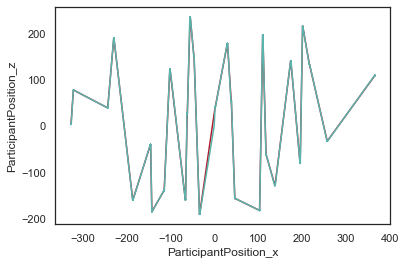

In [141]:
# _, axes = plt.subplots(1, 2, figsize=(15,5))

sns.lineplot(
    data=df_cleaned,
    x='ParticipantPosition_x',
    y='ParticipantPosition_z',
    # ax=axes[0]
)

sns.lineplot(
    data=df_cleaned,
    x='PointerPosition_x',
    y='PointerPosition_z',
    # ax=axes[1]
)

plt.show()

## Calculate angle

### Body as origin


#### Translate the ` building center ` and `pointer direction` by ` participant's position ` so that the ` body position ` goes to origin

In [87]:
df_cleaned['target_position_body_origin_x'] = df_cleaned['BuildingCenterWorld.x'] - df_cleaned.ParticipantPosition_x
df_cleaned['target_position_body_origin_z'] = df_cleaned['BuildingCenterWorld.z'] - df_cleaned.ParticipantPosition_z

df_cleaned['translated_direction_body_origin_x'] = df_cleaned.PointerDirection_x - df_cleaned.ParticipantPosition_x
df_cleaned['translated_direction_body_origin_z'] = df_cleaned.PointerDirection_z - df_cleaned.ParticipantPosition_z

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,Angle,SignedAngle-+180,SignedAngle360,...,Magnitud_Participant-Building,radians,degrees,BuildingID,BuildingCenterWorld.x,BuildingCenterWorld.z,target_position_body_origin_x,target_position_body_origin_z,translated_direction_body_origin_x,translated_direction_body_origin_z
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,87.005028,99.615800,99.615800,...,344.969715,1.835264,105.152855,14,227.649185,119.052856,261.011810,309.964874,32.633346,191.593417
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,44.100197,27.610911,27.610911,...,149.761123,0.833633,47.763652,14,227.649185,119.052856,109.237183,181.994720,-117.468669,63.195982
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,47.522392,6.891651,6.891651,...,31.565180,0.819211,46.937344,14,227.649185,119.052856,-30.280807,152.150543,-258.761596,33.610731
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,1.100918,-171.261997,188.738003,...,499.655970,0.920139,52.720091,14,227.649185,119.052856,470.582397,80.014893,243.918322,-38.886458
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,29.176662,-166.877049,193.122951,...,581.409750,0.862902,49.440636,14,227.649185,119.052856,548.623672,41.855690,321.882095,-77.613205


In [88]:
df_cleaned['theta_target_bo_rad'] = np.arctan2(df_cleaned.target_position_body_origin_z, df_cleaned.target_position_body_origin_x)
df_cleaned['theta_dir_bo_rad'] = np.arctan2(df_cleaned.translated_direction_body_origin_z, df_cleaned.translated_direction_body_origin_x)

df_cleaned['theta_target_bo_deg'] = np.rad2deg(np.arctan2(df_cleaned.target_position_body_origin_z, df_cleaned.target_position_body_origin_x))
df_cleaned['theta_dir_bo_deg'] = np.rad2deg(np.arctan2(df_cleaned.translated_direction_body_origin_z, df_cleaned.translated_direction_body_origin_x))

df_cleaned[['theta_dir_bo_deg', 'theta_target_bo_deg']].describe()

,theta_dir_bo_deg,theta_target_bo_deg
count,3024.000000,3024.000000
mean,-5.704481,-5.561750
std,101.963952,104.907184
min,-163.598954,-179.866720
25%,-96.060525,-99.256689
50%,-11.422642,-2.066974
75%,70.949563,74.223078
max,172.940030,179.845045


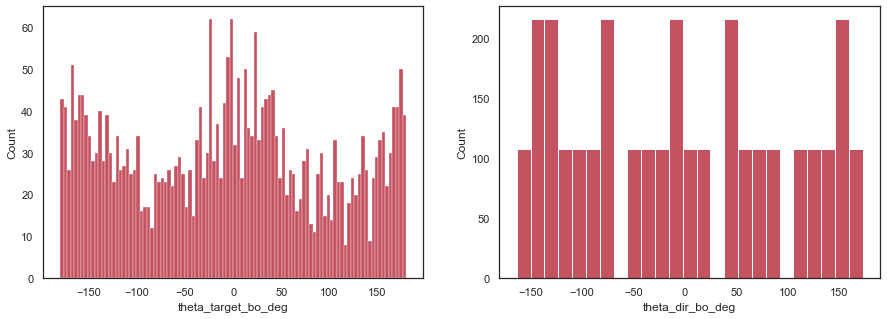

In [111]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(
    data=df_cleaned,
    x='theta_target_bo_deg',
    bins=100,
    ax=axes[0]
)

sns.histplot(
    data=df_cleaned,
    x='theta_dir_bo_deg',
    bins=25,
    ax=axes[1]
)

plt.show()

### Hand as origin

#### Translate the ` building center ` and `pointer direction` by ` pointer position ` so that the ` pointer position ` goes to origin

In [90]:
df_cleaned['target_position_pointer_origin_x'] = df_cleaned['BuildingCenterWorld.x'] - df_cleaned.PointerPosition_x
df_cleaned['target_position_pointer_origin_z'] = df_cleaned['BuildingCenterWorld.z'] - df_cleaned.PointerPosition_z

df_cleaned['translated_direction_pointer_origin_x'] = df_cleaned.PointerDirection_x - df_cleaned.PointerPosition_x
df_cleaned['translated_direction_pointer_origin_z'] = df_cleaned.PointerDirection_z - df_cleaned.PointerPosition_z

df_cleaned.head()

,SubjectID,ParticipantPosition_x,ParticipantPosition_z,PointerPosition_x,PointerPosition_z,PointerDirection_x,PointerDirection_z,Angle,SignedAngle-+180,SignedAngle360,...,translated_direction_body_origin_x,translated_direction_body_origin_z,theta_target_bo_rad,theta_dir_bo_rad,theta_target_bo_deg,theta_dir_bo_deg,target_position_pointer_origin_x,target_position_pointer_origin_z,translated_direction_pointer_origin_x,translated_direction_pointer_origin_z
0,365,-33.362625,-190.912018,-33.590775,-190.709625,-0.729280,0.681399,87.005028,99.615800,99.615800,...,32.633346,191.593417,0.870925,1.402089,49.900308,80.333800,261.239960,309.762482,32.861495,191.391024
1,365,118.412003,-62.941864,118.647705,-63.044891,0.943334,0.254118,44.100197,27.610911,27.610911,...,-117.468669,63.195982,1.030214,2.648023,59.026904,151.720566,109.001480,182.097748,-117.704371,63.299010
2,365,257.929993,-33.097687,257.598694,-32.840240,-0.831603,0.513045,47.522392,6.891651,6.891651,...,-258.761596,33.610731,1.767248,3.012425,101.255862,172.599245,-29.949509,151.893097,-258.430297,33.353285
3,365,-242.933212,39.037964,-242.879013,38.953239,0.985110,0.151506,1.100918,-171.261997,188.738003,...,243.918322,-38.886458,0.168423,-0.158094,9.649925,-9.058101,470.528198,80.099617,243.864123,-38.801733
4,365,-320.974487,77.197166,-320.853760,77.009575,0.907607,-0.416039,29.176662,-166.877049,193.122951,...,321.882095,-77.613205,0.076145,-0.236607,4.362768,-13.556561,548.502945,42.043282,321.761367,-77.425614


#### Calculate the `angle difference` between the `derived direction` and `derived target` points and the `x_axis`

In [91]:
df_cleaned['theta_target_po_rad'] = np.arctan2(df_cleaned.target_position_pointer_origin_z, df_cleaned.target_position_pointer_origin_x)
df_cleaned['theta_dir_po_rad'] = np.arctan2(df_cleaned.translated_direction_pointer_origin_z, df_cleaned.translated_direction_pointer_origin_x)

df_cleaned['theta_target_po_deg'] = np.rad2deg(np.arctan2(df_cleaned.target_position_pointer_origin_z, df_cleaned.target_position_pointer_origin_x))
df_cleaned['theta_dir_po_deg'] = np.rad2deg(np.arctan2(df_cleaned.translated_direction_pointer_origin_z, df_cleaned.translated_direction_pointer_origin_x))

df_cleaned[['theta_dir_po_deg', 'theta_target_po_deg']].describe()

,theta_dir_po_deg,theta_target_po_deg
count,3024.000000,3024.000000
mean,-5.741108,-5.591964
std,101.999604,104.967552
min,-163.555410,-179.986020
25%,-99.346935,-99.559786
50%,-11.396745,-2.201624
75%,70.952295,74.336743
max,172.921938,179.911485


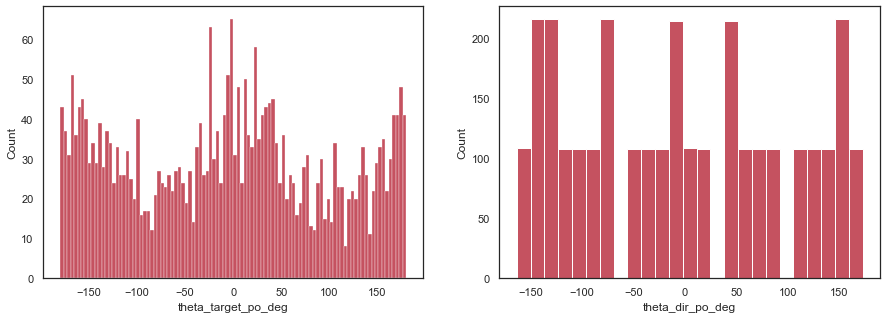

In [112]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(
    data=df_cleaned,
    x='theta_target_po_deg',
    bins=100,
    ax=axes[0]
)

sns.histplot(
    data=df_cleaned,
    x='theta_dir_po_deg',
    bins=25,
    ax=axes[1]
)

plt.show()

#### Calculate angle deviation between the selected direction and the target

Convert the angles to 360 degree

In [107]:
df_cleaned['angle_target_360_bo_deg'] = np.where(
    df_cleaned.theta_target_bo_deg < 0,
    360 + df_cleaned.theta_target_bo_deg,
    df_cleaned.theta_target_bo_deg
)

df_cleaned['angle_dir_360_bo_deg'] = np.where(
    df_cleaned.theta_dir_bo_deg < 0,
    360 + df_cleaned.theta_dir_bo_deg,
    df_cleaned.theta_dir_bo_deg
)

df_cleaned['angle_target_360_po_deg'] = np.where(
    df_cleaned.theta_target_po_deg < 0,
    360 + df_cleaned.theta_target_po_deg,
    df_cleaned.theta_target_po_deg
)

df_cleaned['angle_dir_360_po_deg'] = np.where(
    df_cleaned.theta_dir_po_deg < 0,
    360 + df_cleaned.theta_dir_po_deg,
    df_cleaned.theta_dir_po_deg
)

df_cleaned[['angle_target_360_bo_deg',
            'angle_dir_360_bo_deg',
            'angle_target_360_po_deg',
            'angle_dir_360_po_deg'
            ]].describe()

,angle_target_360_bo_deg,angle_dir_360_bo_deg,angle_target_360_po_deg,angle_dir_360_po_deg
count,3024.000000,3024.000000,3024.000000,3024.000000
mean,180.271583,200.009805,180.360417,199.973178
std,108.309738,103.577549,108.255984,103.570119
min,0.063520,15.130574,0.027850,0.000000
25%,80.996111,116.238934,81.748799,116.269226
50%,184.373134,215.181459,184.430862,211.759485
75%,268.871440,284.156973,268.903062,283.275273
max,359.773355,359.517805,359.866906,359.518885


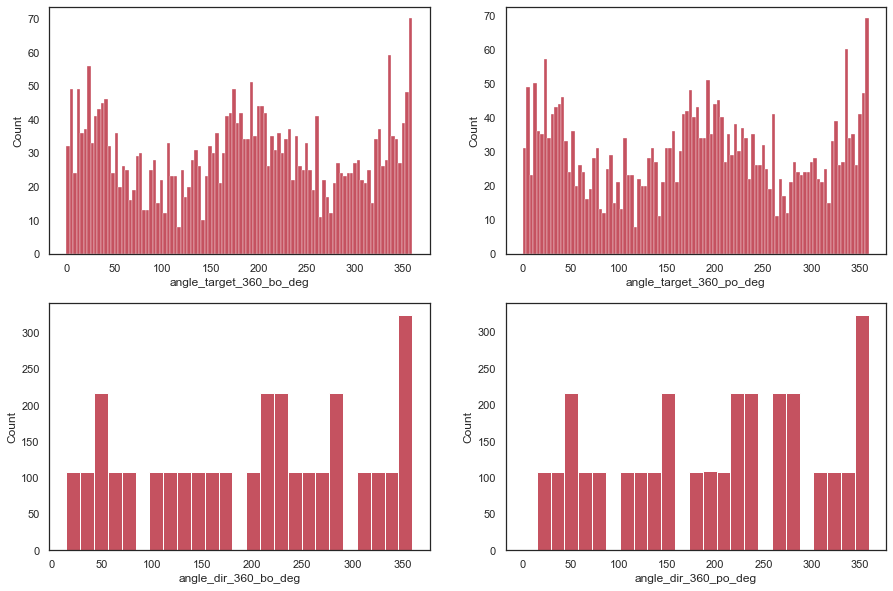

In [113]:
_, axes = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(
    data=df_cleaned,
    x='angle_target_360_bo_deg',
    bins=100,
    ax=axes[0,0]
)

sns.histplot(
    data=df_cleaned,
    x='angle_target_360_po_deg',
    bins=100,
    ax=axes[0,1]
)

sns.histplot(
    data=df_cleaned,
    x='angle_dir_360_bo_deg',
    bins=25,
    ax=axes[1,0]
)

sns.histplot(
    data=df_cleaned,
    x='angle_dir_360_po_deg',
    bins=25,
    ax=axes[1,1]
)

plt.show()

In [115]:
df_cleaned['signed_angle_bo_deg'] = df_cleaned.angle_dir_360_bo_deg - df_cleaned.angle_target_360_bo_deg
df_cleaned.signed_angle_bo_deg = (df_cleaned.signed_angle_bo_deg + 180) % 360 - 180

df_cleaned['signed_angle_po_deg'] = df_cleaned.angle_dir_360_po_deg - df_cleaned.angle_target_360_po_deg
df_cleaned.signed_angle_po_deg = (df_cleaned.signed_angle_po_deg + 180) % 360 - 180


df_cleaned[['signed_angle_bo_deg', 'signed_angle_po_deg']].describe()

,signed_angle_bo_deg,signed_angle_po_deg
count,3024.000000,3024.000000
mean,0.333460,0.327047
std,57.130956,57.198216
min,-179.372529,-179.395091
25%,-30.583479,-30.633254
50%,-0.656309,-0.506216
75%,30.477427,30.515686
max,179.736428,179.071054


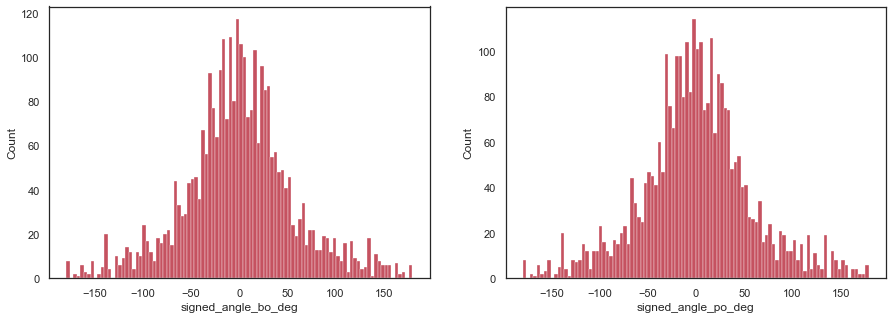

In [132]:
_, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(
    data=df_cleaned,
    x='signed_angle_bo_deg',
    bins=100,
    ax=axes[0]
)

sns.histplot(
    data=df_cleaned,
    x='signed_angle_po_deg',
    bins=100,
    ax=axes[1]
)

plt.show()